In [1]:
import sys
import os
import glob
sys.path.append("../")
from yoloneatviz import HolovizNapari
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot  as plt
from natsort import natsorted
import numpy as np

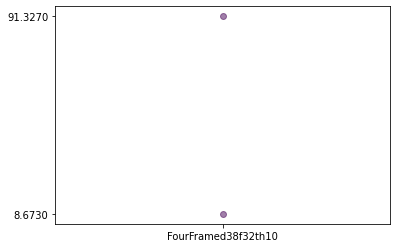

,MovieName,NetworkName,CellType,True Positives,False Positives
0,DivisionLocationwt_mov12_SW30,FourFramed38f32th10,Division,8.6730,91.3270


In [17]:
thresholdspace = 40
thresholdtime = 10
thresholdscore = 1 -  1.0E-3
MovieName = []
NetworkName = []
CellName = []
Accuracy = []
FPAccuracy = []
resultsdir = '/Users/aimachine/oneat_analysis/WildType/AccuracyResults/'
Path(resultsdir).mkdir(exist_ok=True)
csv_gt = '/Users/aimachine/oneat_analysis/WildType/DivisionLocationwt_mov12_SW30.csv'

csv_pred = '/Users/aimachine/oneat_analysis/WildType/MicroResultstshift2micronetd38f32_th20/DivisionLocationwt_mov12_SW30.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp, fp = HolovizNapari.TruePositives(csv_gt, csv_pred, thresholdscore = thresholdscore, thresholdspace = thresholdspace, thresholdtime = thresholdtime)
MovieName.append(Name)
NetworkName.append('FourFramed38f32th10')
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))
FPAccuracy.append(str('%.4f'%fp))

df = pd.DataFrame(list(zip(MovieName,NetworkName,CellName,Accuracy, FPAccuracy)), index = None, 
                                                                      columns =['MovieName', 'NetworkName', 'CellType',  'True Positives', 'False Positives'])
                        
df.to_csv(resultsdir + '/' + 'DivisionDynamicAccuracy' +  '.csv')  
df

Accuracy = natsorted(Accuracy, reverse = True)
FPAccuracy = natsorted(FPAccuracy, reverse = True)
colors = np.random.rand(len(Accuracy))
plt.scatter(NetworkName, Accuracy,  alpha=0.5, c = colors)

colors = np.random.rand(len(FPAccuracy))
plt.scatter(NetworkName, FPAccuracy,  alpha=0.5, c = colors)
plt.savefig(resultsdir + '/' + 'FullDynamicaccuracy' + '.png', dpi = 300)
plt.show()
df